In [18]:
import pandas as pd

In [19]:
seed = 42

In [20]:
# Load the different features and join them
word2vec = 'word2vec'

labels_train = pd.read_csv('feature_vectors/labels_train.csv')
labels_test = pd.read_csv('feature_vectors/labels_test.csv')

sentiment_train = pd.read_csv('feature_vectors/sentiment_train.csv')
sentiment_test = pd.read_csv('feature_vectors/sentiment_test.csv')

word2vec_train = pd.read_csv('feature_vectors/train-word2vec-num_features_100_min_word_count_10.csv')
word2vec_test = pd.read_csv('feature_vectors/test-word2vec-num_features_100_min_word_count_10.csv')


df_list = [labels_train, sentiment_train, word2vec_train]
train = df_list[0]
for df in df_list[1:]:
    train = train.merge(df, on='id')
    
df_list = [labels_test, sentiment_test, word2vec_test]
test = df_list[0]
for df in df_list[1:]:
    test = test.merge(df, on='id')
    
train.head()

,id,subtask_a,subtask_b,subtask_c,hate_count,positive_count,negative_count,hate_normalized,positive_normalized,negative_normalized,...,90,91,92,93,94,95,96,97,98,99
0,86426,OFF,UNT,NaN,0,0,0,0.0,0.000000,0.000000,...,-0.000262,-0.043734,-0.103292,0.095441,-0.086137,-0.167084,-0.083201,0.106072,-0.063322,-0.043647
1,90194,OFF,TIN,IND,0,0,0,0.0,0.000000,0.000000,...,0.085329,-0.036498,-0.041904,0.094420,-0.085861,-0.132010,-0.074978,0.103005,-0.056452,-0.002916
2,16820,NOT,NaN,NaN,0,1,0,0.0,0.037037,0.000000,...,0.024784,-0.036471,-0.061951,0.132558,-0.080589,-0.177264,-0.099771,0.093564,-0.097557,-0.007000
3,62688,OFF,UNT,NaN,0,0,1,0.0,0.000000,0.090909,...,0.007430,-0.006138,-0.098574,0.106535,-0.075268,-0.162966,-0.085685,0.091813,-0.074811,-0.019161
4,43605,NOT,NaN,NaN,0,0,0,0.0,0.000000,0.000000,...,0.043138,-0.005813,-0.103573,0.142955,-0.088360,-0.174962,-0.103088,0.109847,-0.079658,-0.000437


In [21]:
labels = [1 if s=='OFF' else 0 for s in df_list[0]['subtask_a']]
sum(labels)/len(labels)

0.240625

In [22]:
# Split the data

from sklearn.preprocessing import LabelEncoder
binarizer = LabelEncoder()

y_a_train = binarizer.fit_transform(train.iloc[:,1].astype(str))
y_b_train = binarizer.fit_transform(train.iloc[:,2].astype(str))
y_c_train = binarizer.fit_transform(train.iloc[:,3].astype(str))
X_train = train.iloc[:,4:]

y_a_test = binarizer.fit_transform(test.iloc[:,1].astype(str))
y_b_test = binarizer.fit_transform(test.iloc[:,2].astype(str))
y_c_test = binarizer.fit_transform(test.iloc[:,3].astype(str))
X_test = test.iloc[:,4:]

# smushed = np.append(X_train, np.array([y_a_train]).T, axis=1)
# not_off = np.array([entry for entry in smushed if entry[6] == 0])
# off = np.array([entry for entry in smushed if entry[6] == 1])
# idx = np.random.choice(off.shape[0], not_off.shape[0] - off.shape[0], replace=True)
# sampled = off[idx,:]
# normed = np.append(smushed, sampled, axis=0)
# print(normed.shape)
# np.random.shuffle(normed)
# y_a_train = normed[:, 6]
# X_train = pd.DataFrame(normed[:, :6], columns=['hate_count', 'positive_count', 'negative_count', 
#                                                'hate_normalized', 'positive_normalized', 'negative_normalized'])

In [23]:
# Scale the data to be normalized

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
# Create different classifiers

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.svm import SVC

lr = LogisticRegression(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
mlp = MLPClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
svc = SVC(random_state=seed)

In [25]:
# Logistic Regression
lr.fit(X_train, y_a_train)
f1_score(lr.predict(X_test), y_a_test)

0.4462809917355372

In [26]:
# Gradient Boosting Classifier
gb.fit(X_train, y_a_train)
f1_score(gb.predict(X_test), y_a_test)

0.4148148148148148

In [27]:
# XGB Classifier
xgb.fit(X_train, y_a_train)
f1_score(xgb.predict(X_test), y_a_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.44274809160305345

In [28]:
# MLP Classifier
mlp.fit(X_train, y_a_train)
f1_score(mlp.predict(X_test), y_a_test)

0.46511627906976744

In [29]:
# Random Forest Classifier

rf.fit(X_train, y_a_train)
f1_score(rf.predict(X_test), y_a_test)

0.35714285714285715

In [30]:
svc.fit(X_train, y_a_train)
f1_score(svc.predict(X_test), y_a_test)

0.38888888888888884

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes=None, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[222  21]
 [ 49  28]]


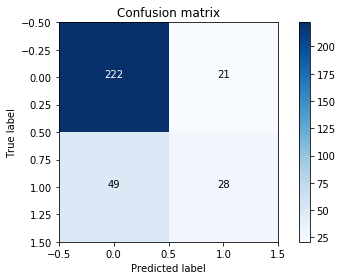

F1: 0.4444444444444444


In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

estimators=[]
estimators.append(('gb', gb))
estimators.append(('lr', lr))
estimators.append(('mlp', mlp))
estimators.append(('xgb', xgb))

ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_a_train)
y_pred = ensemble.predict(X_test)
matrix = confusion_matrix(y_a_test, y_pred)

plot_confusion_matrix(matrix)
print('F1: {}'.format(f1_score(y_a_test, y_pred)))

Confusion matrix, without normalization
[[218  25]
 [ 46  31]]


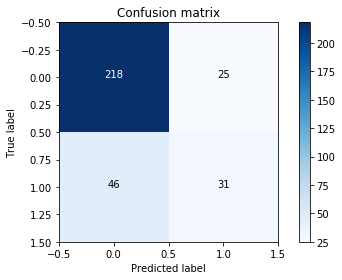

F1: 0.46616541353383456


In [33]:
from mlxtend.classifier import StackingCVClassifier

np.random.seed(seed)
stack = StackingCVClassifier(classifiers=[gb, lr, mlp, xgb], cv=2, meta_classifier=mlp, use_probas=True)
stack.fit(X_train.values, y_a_train)
y_pred = stack.predict(X_test.values)
matrix = confusion_matrix(y_a_test, y_pred)

plot_confusion_matrix(matrix)
print('F1: {}'.format(f1_score(y_a_test, y_pred)))